In [143]:
!pip install ht CoolProp matplotlib numpy scipy tikzplotlib

You should consider upgrading via the '/home/juan/anaconda3/bin/python -m pip install --upgrade pip' command.


# Propiedades de Fluidos 
## Uso de CoolProp
<p style='text-align: right;'>primera versión del alumno Juan Segundo Basombrio </p>

In [145]:
%matplotlib inline
import numpy as np
import CoolProp as cp
import matplotlib.pyplot as plt
from tikzplotlib import save as tikz_save

In [113]:
temperatura_s = np.linspace(273.16,647.096,200)
rho_s_l,rho_s_v,entalpia_l,entalpia_v = np.tile(np.zeros_like(temperatura_s),[4,1])


entalpia_lv = np.tile(np.zeros_like(temperatura_s),[10,1])
entalpia_lv2 = np.tile(np.zeros_like(temperatura_s),[10,1])
presiones_lv = np.zeros((10,1))

### Evaluamos propiedades de agua / vapor para un rango de temperaturas
    - liquido saturado
    - vapor saturado
    - distintos títulos de vapor
    - rango de presiones

In [134]:
for i,temperatura_s_i in enumerate(temperatura_s):
    rho_s_l[i] = cp.CoolProp.PropsSI('D','T',temperatura_s_i,'Q',0,'Water')  
    rho_s_v[i] = cp.CoolProp.PropsSI('D','T',temperatura_s_i,'Q',1,'Water')  
    entalpia_l[i] = cp.CoolProp.PropsSI('H','T',temperatura_s_i,'Q',0,'Water')  /1e3
    entalpia_v[i] = cp.CoolProp.PropsSI('H','T',temperatura_s_i,'Q',1,'Water') /1e3
    
    
    for j,entalpia_lvj in enumerate(entalpia_lv[:]):            
        entalpia_lvj[i] = cp.CoolProp.PropsSI('H','T',temperatura_s_i,'Q',.1*j,'Water') /1e3
        
    for j,temperatura_s_j in enumerate(np.linspace(280,640,10)):
        presiones_lv[j] = cp.CoolProp.PropsSI('P','T',temperatura_s_j,'Q',0.5,'Water') 
    for j, entalpia_lv2j in enumerate(entalpia_lv2):
        entalpia_lv2j[i] = cp.CoolProp.PropsSI('H','T',temperatura_s_i,'P',presiones_lv[j],'Water') /1e3
    

# Diagrama T H del Agua / Vapor

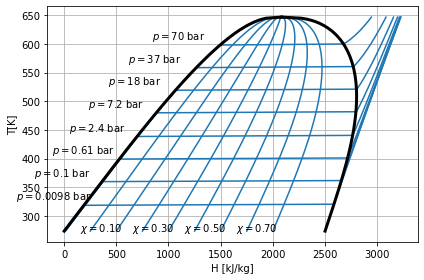

In [147]:
fig,ax = plt.subplots()
lin1, = ax.plot(entalpia_lv[0],temperatura_s)
for j,entalpia_lvj in enumerate(entalpia_lv[1:-1]):
    ax.plot(entalpia_lvj,temperatura_s,color=lin1.get_color())
    if j/2 == np.floor(j/2):
        ax.text(entalpia_lvj[0]-100,temperatura_s[0],f'$\chi={.1*j+.1:.2f}$')
for j,entalpia_lv2j in enumerate(entalpia_lv2[1:-1]):
    nmax = np.diff(entalpia_lv2j).argmax()
    ax.plot(entalpia_lv2j,temperatura_s,color=lin1.get_color())
    ax.text(entalpia_lv2j[nmax]-650,temperatura_s[nmax]+10,f'$p={presiones_lv[j][0]/101.3e3:.2g}$ bar')    
ax.plot(entalpia_l,temperatura_s,linewidth=3,color='k')
ax.plot(entalpia_v,temperatura_s,linewidth=3,color='k')

ax.set_ylabel('T[K]');
ax.set_xlabel('H [kJ/kg]');
ax.grid()
fig.tight_layout()
tikz_save('Diagrama_vapor.tikz')

In [3]:
#Propiedades de agua y vapor

#EL numero que le sigue a Q es el titulo, en este caso es 0, por lo que tiene 0% de vapor
#Todos los valors los da en el sistema internacional de unidades SI
#EL fluido se modifica del texto "Water" buscar en la web de Coolprop cuales se encuentran incluidos

#si queremos calcular los parametros en base a la P de saturacion, colocamos una P dentro de  '' en b
# si queremos calcular los parametros en base a la Temperatura de referencia colocamos T

Tr = 273+10
P_sat = 101.3e3 # [Pa]
b = 'T'
#Debajo colocamos acorde a lo anterior ya sea Tr o P_sat
b2 = Tr


rho_a = cp.CoolProp.PropsSI('D',b,b2,'Q',0,'Water')                #densidad
k_a =  cp.CoolProp.PropsSI('L',b,b2,'Q',0,'Water')                 # K del agua a esa P de sat
cp_a = cp.CoolProp.PropsSI('C',b,b2,'Q',0,'Water')                 # Cp del agua a esa P de sat
mu_a = cp.CoolProp.PropsSI('V',b,b2,'Q',0,'Water')                 # Viscosidad dinamica del agua a esa P de sat
T_st = cp.CoolProp.PropsSI('T',b,b2,'Q',0,'Water')                # Temperatura de Saturación a esa P sat
T_sat = cp.CoolProp.PropsSI('T','P',P_sat,'Q',0,'Water')           # Temperatura de saturacion a una determinada presion, si estamos evaluando segun presiones es igual a Tst si estamos con Tr no es lo mismo!
sigma = cp.CoolProp.PropsSI('surface_tension',b,b2,'Q',0,'Water')  # Tension superficial del agua a esa P de sat
nu_a = mu_a/rho_a                                                       # Viscosidad cinemtaica del agua a esa P de sat
alfa_a = k_a/(rho_a*cp_a)
pr_a = nu_a/alfa_a
P_st = cp.CoolProp.PropsSI('P',b,b2,'Q',0,'Water')

#EL numero que le sigue a Q es el titulo, en este caso es 0, por lo que tiene 0% de vapor
rho_v = cp.CoolProp.PropsSI('D',b,b2,'Q',1,'Water')  # Densidad del vapor
k_v =  cp.CoolProp.PropsSI('L',b,b2,'Q',1,'Water')   # K del vapor
cp_v = cp.CoolProp.PropsSI('C',b,b2,'Q',1,'Water')   # Cp del vapor a esa P de sat
mu_v = cp.CoolProp.PropsSI('V',b,b2,'Q',1,'Water')   # viscosidad dinamica del vapor a esa P de sat
nu_v = mu_v/rho_v                                         # Viscosidad cinematica del vapor a esa P de sat

H_a =   cp.CoolProp.PropsSI('H',b,b2,'Q',0,'Water')  #Entalpía del agua a esa P de sat
H_v = cp.CoolProp.PropsSI('H',b,b2,'Q',1,'Water')    # Entalpía del vapor a esa p de sat
Deltai_vap = H_v-H_a  #                                    # Delta entalpía condensacion o Hfg se lee en J/kg

## ANTES DE MIRAR LOS DATOS FIJARSE SI LO QUE NECESITAMOS ES PSAT O TSAT (TST O PST)
print('parametros calculados en base a una ', b,'=', b2)

print('datos agua')
print('densidad liq [kg/m3] = ', rho_a)
print('K liq [W/mK] = ', k_a)
print('Cp liq [J/kg K] = ', cp_a)
print('viscosidad din u liq [Pa.s = kg/m.s] = ', mu_a)
#print('T_sat liq [K] = ', T_sat)
print('sigma [N/m] = ', sigma)
print('viscosidad cinem v liq [m2/s]= ', nu_a)
print('alfa liq = ', alfa_a)
print('prnadtl liq = ', pr_a)
print('P st liq [Pa]= ', P_st)
print('T st [K] = ', T_st)
print('T sat a la P_sat [k] = ', T_sat)

print('datos vapor')
print('densidad vap [kg/m3] = ', rho_v)
print('K vap [W/m K] = ', k_v)
print('Cp vap [J/Kg K] = ', cp_v)
print('viscosidad din u vap [Pa.s = Kg/m.s] = ', mu_v)
print('viscosidad cinem v vapo [m2/s]= ', nu_v)

print("hfg [J/kg] = ",Deltai_vap)

parametros calculados en base a una  T = 283
datos agua
densidad liq [kg/m3] =  999.6676170529616
K liq [W/mK] =  0.5783970993045582
Cp liq [J/kg K] =  4195.785247364795
viscosidad din u liq [Pa.s = kg/m.s] =  0.0013116506760159838
sigma [N/m] =  0.07431524696090372
viscosidad cinem v liq [m2/s]=  1.312086791290443e-06
alfa liq =  1.378977660789523e-07
prnadtl liq =  9.51492419782361
P st liq [Pa]=  1215.9084095945032
T st [K] =  283.0
T sat a la P_sat [k] =  373.1173825497736
datos vapor
densidad vap [kg/m3] =  0.009317799424605196
K vap [W/m K] =  0.017402254283502522
Cp vap [J/Kg K] =  1894.5385032282493
viscosidad din u vap [Pa.s = Kg/m.s] =  9.233941787157986e-06
viscosidad cinem v vapo [m2/s]=  0.0009910002744611811
hfg [J/kg] =  2477542.33106365
